In [1]:
#Unspervised Learning - k Means Clustering
#In Clustering - There is No y (output),we only consider i/p


In [3]:
#1.take data and create dataframe
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.shape


(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
#Input - Age and EstimatedSalary

In [15]:
#4.divide the data into i/p
x = df.iloc[:,2:4].values
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


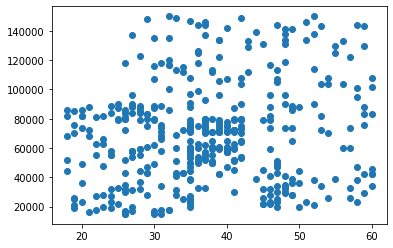

In [14]:
#visualisation
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['EstimatedSalary'])


In [16]:
#no.of clusters(k)
import numpy as np
np.sqrt(400) #400 is the total no of points
 

20.0

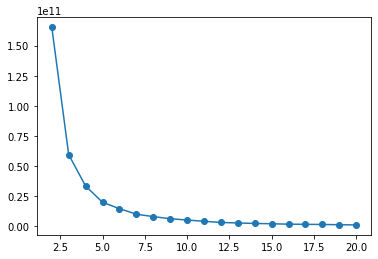

In [17]:
#1.Elbow Method
from sklearn.cluster import KMeans
k = range(2,21)
sse = [] #blank list
for i in k :
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)
plt.scatter(k,sse) 
plt.plot(k,sse) 


2 Clusters ,Score = 0.5383447769895185 
3 Clusters ,Score = 0.6014958224112057 
4 Clusters ,Score = 0.6065989841357814 
5 Clusters ,Score = 0.6102051324759187 
6 Clusters ,Score = 0.5845746920707843 
7 Clusters ,Score = 0.5771254474001397 
8 Clusters ,Score = 0.5733466101369712 
9 Clusters ,Score = 0.5678580889891727 
10 Clusters ,Score = 0.5657683924101718 
11 Clusters ,Score = 0.5761875645951622 
12 Clusters ,Score = 0.5897993085433534 
13 Clusters ,Score = 0.5854488039371673 
14 Clusters ,Score = 0.5856809364511572 
15 Clusters ,Score = 0.5882350637483011 
16 Clusters ,Score = 0.5946386086550567 
17 Clusters ,Score = 0.582755930706653 
18 Clusters ,Score = 0.5615396281207775 
19 Clusters ,Score = 0.5771256629445541 
20 Clusters ,Score = 0.5799200775818416 


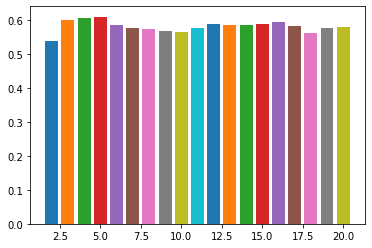

In [19]:
#we belive elbow  point is at 5
#2.SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,21)
for i in k :
   model_demo = KMeans(n_clusters = i,random_state = 0)
   model_demo.fit(x)
   y_pred = model_demo.predict(x)
   print(f"{i} Clusters ,Score = {silhouette_score(x,y_pred)} ")
   plt.bar(i,silhouette_score(x,y_pred))

In [20]:
#confirmation: the No of Clusters is considered Is 5


In [21]:
#7.Apply Clusterer
k = 5
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)



KMeans(n_clusters=5, random_state=0)

In [22]:
y = model.predict(x) #predicted output
y

array([2, 2, 1, 1, 3, 1, 3, 4, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 3, 4, 2, 1, 3, 2, 2, 1, 3, 2, 2, 1, 0, 2,
       3, 2, 3, 1, 4, 3, 2, 1, 3, 2, 1, 1, 1, 3, 2, 0, 2, 3, 1, 0, 3, 1,
       2, 3, 1, 3, 3, 2, 2, 0, 2, 0, 1, 2, 3, 2, 3, 1, 1, 3, 1, 0, 1, 3,
       3, 1, 3, 0, 2, 2, 3, 1, 2, 0, 3, 2, 3, 1, 3, 4, 2, 3, 2, 3, 3, 3,
       3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 2, 2, 3, 1, 2,
       3, 3, 1, 1, 3, 0, 1, 2, 3, 3, 1, 3, 2, 3, 0, 2, 1, 3, 2, 1, 3, 1,
       1, 2, 1, 3, 2, 4, 0, 3, 2, 2, 3, 3, 1, 3, 4, 1, 3, 0, 0, 1, 3, 2,
       1, 2, 2, 2, 2, 3, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2, 1, 3, 3, 1, 3, 2,
       3, 2, 2, 3, 4, 3, 0, 1, 4, 0, 4, 2, 0, 4, 1, 1, 1, 0, 1, 3, 0, 4,
       3, 3, 4, 0, 1, 1, 4, 4, 3, 3, 4, 1, 0, 3, 0, 3, 1, 3, 3, 4, 4, 1,
       3, 0, 3, 4, 1, 0, 1, 0, 2, 1, 4, 4, 1, 3, 3, 1, 0, 4, 3, 4, 4, 3,
       3, 0, 3, 3, 4, 1, 4, 3, 1, 0, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 4, 3,
       1, 4, 3, 3, 4, 3, 2, 3, 1, 1, 3, 0, 3, 0, 2,

In [24]:
y.size

400

In [29]:
x[y==1,1] #cluster 1 is selected and column index 1 is selected

array([43000, 57000, 58000, 65000, 52000, 49000, 41000, 43000, 44000,
       49000, 51000, 54000, 44000, 58000, 55000, 48000, 66000, 58000,
       63000, 52000, 42000, 49000, 62000, 55000, 50000, 44000, 59000,
       61000, 55000, 57000, 52000, 59000, 59000, 53000, 51000, 61000,
       65000, 58000, 55000, 63000, 59000, 59000, 61000, 45000, 50000,
       47000, 59000, 55000, 47000, 43000, 47000, 43000, 60000, 66000,
       41000, 43000, 43000, 47000, 42000, 58000, 43000, 65000, 60000,
       53000, 42000, 57000, 59000, 50000, 52000, 52000, 44000, 57000,
       61000, 42000, 61000, 62000, 57000, 63000, 60000, 54000, 50000,
       50000, 55000, 60000, 52000, 60000, 51000, 65000, 65000, 60000,
       54000, 55000, 65000, 51000, 63000, 61000, 57000, 54000, 50000,
       47000, 46000, 53000, 64000, 60000, 45000, 42000, 59000, 41000])

In [30]:
np.unique(y,return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 43, 108,  87, 124,  38]))

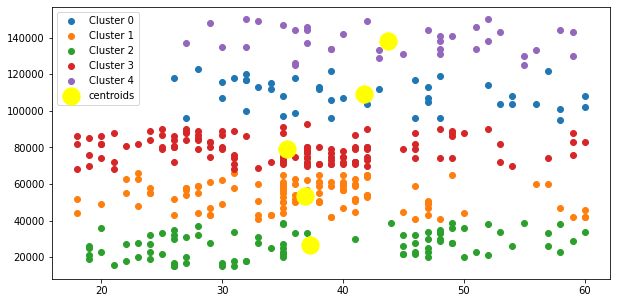

In [32]:
#Final Visualisation
plt.figure(figsize = (10,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300, c = 'yellow',label = 'centroids')
plt.legend()  